In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
from skimage import measure
import xarray as xr

ds = xr.open_dataset('/home/sebastian/Documentos/analisisNETCDF/ivt_s_6_2022_Jan.nc')
df = ds.to_dataframe()



# Filtrar valores mayores a 250
df_filtered = df.loc[df['ivt'] > 250]

# Resetear el índice y agregar el número como índice al principio
df_filtered.reset_index(inplace=True)
df_filtered.index += 1

# Renombrar el nombre de la columna de índice
df = df_filtered.rename_axis("Index", axis="columns")

# Imprimir el DataFrame
print(df)

Index                  time  latitude  longitude         ivt
1       2022-01-01 00:00:00    -57.75     -54.25  251.807892
2       2022-01-01 00:00:00    -57.75     -54.00  256.242828
3       2022-01-01 00:00:00    -57.75     -53.75  256.437347
4       2022-01-01 00:00:00    -57.75     -53.50  256.694092
5       2022-01-01 00:00:00    -57.75     -53.25  254.901627
...                     ...       ...        ...         ...
2483966 2022-01-31 18:00:00     15.00     -26.00  268.630615
2483967 2022-01-31 18:00:00     15.00     -25.75  276.027283
2483968 2022-01-31 18:00:00     15.00     -25.50  281.533051
2483969 2022-01-31 18:00:00     15.00     -25.25  289.593353
2483970 2022-01-31 18:00:00     15.00     -25.00  293.868347

[2483970 rows x 4 columns]


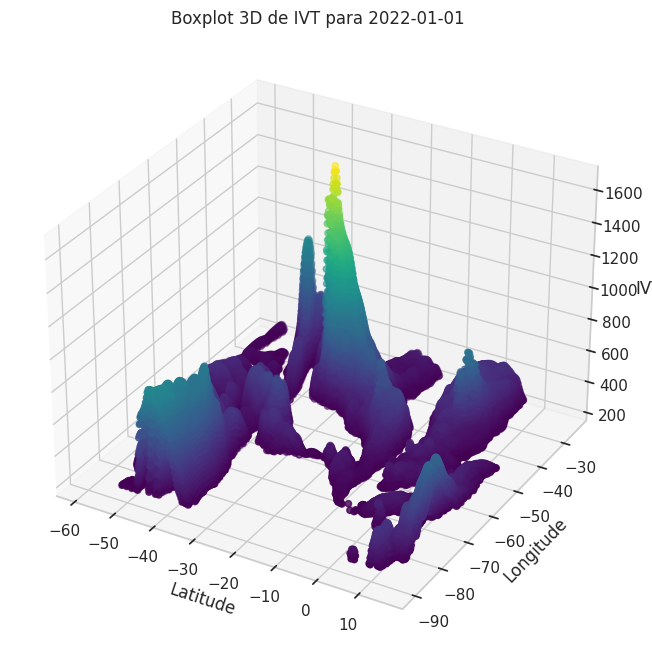

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame llamado df con las columnas "latitude", "longitude", "ivt" y "time"

# Filtrar los datos para la fecha "2022-01-01"
fecha_seleccionada = "2022-01-01"
df_filtrado = df[df["time"].dt.date == pd.to_datetime(fecha_seleccionada).date()]

# Crear un gráfico de caja 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Configurar las variables
x_data = df_filtrado["latitude"]
y_data = df_filtrado["longitude"]
z_data = df_filtrado["ivt"]

# Crear el gráfico de caja 3D
ax.scatter(x_data, y_data, z_data, c=z_data, cmap="viridis")

# Configuraciones adicionales
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("IVT")
ax.set_title(f'Boxplot 3D de IVT para {fecha_seleccionada}')

# Mostrar el gráfico
plt.show()
